<a href="https://colab.research.google.com/github/KiteCoder32/Data-Analysis-/blob/main/interactiveassm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step 1.: Check for Missing Values, Outliers, and Inconsistent Data**

# 1.1 Load Data & Initial Check

In [ ]:
import pandas as pd

In [ ]:
# Load dataset
df = pd.read_csv("/content/retail_fashion_dataset.csv")

In [ ]:
# Display basic info
print(df.info())  # Data types and nulls
print(df.head())  # Preview first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Gender              1000 non-null   object 
 2   Age                 1000 non-null   int64  
 3   Location            1000 non-null   object 
 4   Membership          1000 non-null   object 
 5   AnnualIncome        1000 non-null   int64  
 6   ProductCategory     1000 non-null   object 
 7   AmountSpent         1000 non-null   float64
 8   ItemsPurchased      1000 non-null   int64  
 9   SatisfactionRating  1000 non-null   int64  
 10  Returned            1000 non-null   object 
 11  PaymentMethod       1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB
None
   Unnamed: 0  Gender  Age Location Membership  AnnualIncome  \
0           1    Male   33    Dhaka   Platinum        573959   
1           

## 1.2 Remove Unnecessary Columns

In [ ]:
# Drop unnamed index column if present
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Gender                0
Age                   0
Location              0
Membership            0
AnnualIncome          0
ProductCategory       0
AmountSpent           0
ItemsPurchased        0
SatisfactionRating    0
Returned              0
PaymentMethod         0
dtype: int64


In [ ]:
# Detect outliers for numerical columns using IQR
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Age: 1 outliers
AnnualIncome: 6 outliers
AmountSpent: 4 outliers
ItemsPurchased: 18 outliers
SatisfactionRating: 0 outliers


In [ ]:
# Detect outliers for numerical columns using IQR
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Age: 1 outliers
AnnualIncome: 6 outliers
AmountSpent: 4 outliers
ItemsPurchased: 18 outliers
SatisfactionRating: 0 outliers


In [ ]:
# Check for inconsistencies data
print("Inconsistent Data:")
print("Age < 0:", (df["Age"] < 0).sum())
print("AnnualIncome < 0:", (df["AnnualIncome"] < 0).sum())
print("AmountSpent < 0:", (df["AmountSpent"] < 0).sum())
print("ItemsPurchased < 0:", (df["ItemsPurchased"] < 0).sum())


Inconsistent Data:
Age < 0: 0
AnnualIncome < 0: 0
AmountSpent < 0: 0
ItemsPurchased < 0: 0


# 1.2: Data Type Conversion

In [ ]:
# Convert relevant columns to categorical
cat_columns = ['Gender', 'Location', 'Membership', 'ProductCategory', 'Returned', 'PaymentMethod']
df[cat_columns] = df[cat_columns].astype("category")

# Check new data types
print(df.dtypes)


Gender                category
Age                      int64
Location              category
Membership            category
AnnualIncome             int64
ProductCategory       category
AmountSpent            float64
ItemsPurchased           int64
SatisfactionRating       int64
Returned              category
PaymentMethod         category
dtype: object


# 1.3: Handle Categorical Variables

In [ ]:
# Use get_dummies for encoding, drop_first to avoid dummy trap
df_encoded = pd.get_dummies(df, drop_first=True)

# Check encoded dataframe
print(df_encoded.head())

   Age  AnnualIncome  AmountSpent  ItemsPurchased  SatisfactionRating  \
0   33        573959      3878.15               0                   3   
1   18       1282335      2753.63               3                   3   
2   35       1103278      3591.77               4                   4   
3   38        920423      3863.37               4                   2   
4   37        814407      3335.53               5                   2   

   Gender_Male  Gender_Other  Location_Chattogram  Location_Dhaka  \
0         True         False                False            True   
1        False          True                False            True   
2        False         False                False           False   
3        False         False                False           False   
4         True         False                False            True   

   Location_Khulna  ...  Membership_Silver  ProductCategory_Bottoms  \
0            False  ...              False                    False   
1   

# **Step 2: Exploratory Data Analysis (EDA)**

In [ ]:
# Get descriptive statistics for numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].describe()

,Age,AnnualIncome,AmountSpent,ItemsPurchased,SatisfactionRating
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,32.796000,7.975050e+05,3038.726240,3.022000,3.031000
std,9.254298,2.043810e+05,998.296348,1.765399,1.421992
min,18.000000,2.141100e+05,500.000000,0.000000,1.000000
25%,26.000000,6.532608e+05,2342.557500,2.000000,2.000000
50%,32.000000,8.015055e+05,3024.135000,3.000000,3.000000
75%,39.000000,9.330095e+05,3707.177500,4.000000,4.000000
max,63.000000,1.448618e+06,7052.550000,11.000000,5.000000


# **2.2: Univariate Analysis**

# 2.2.i: Histograms (e.g., Age, AmountSpent)

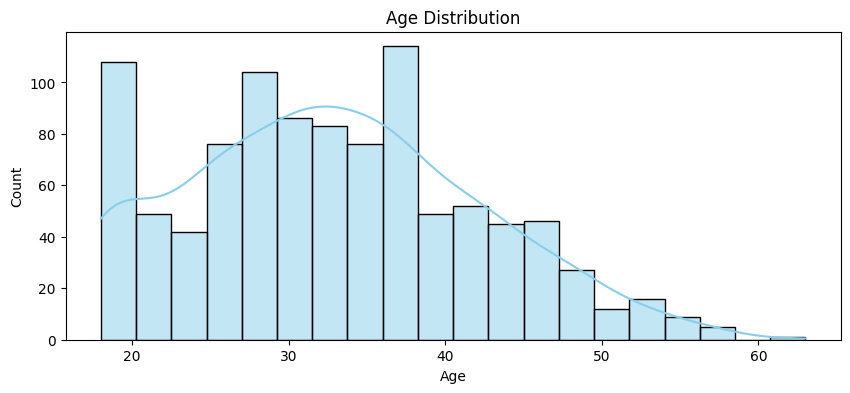

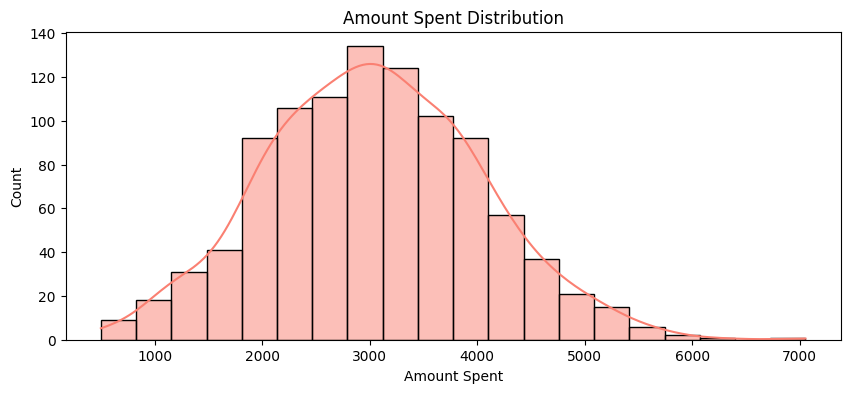

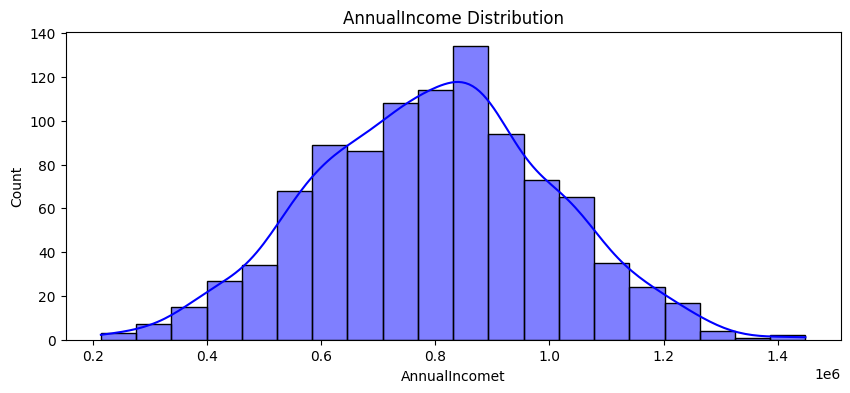

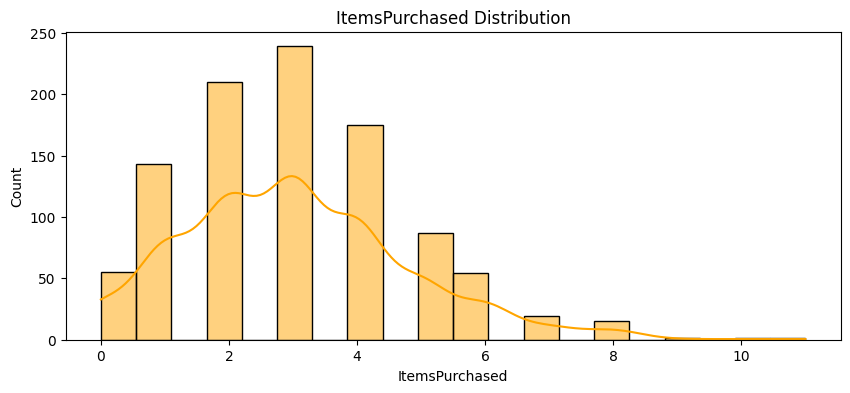

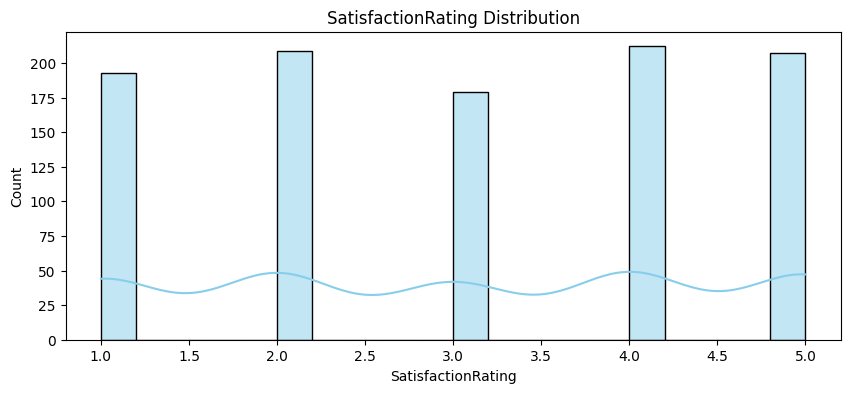

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Amount Spent Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['AmountSpent'], kde=True, bins=20, color='salmon')
plt.title("Amount Spent Distribution")
plt.xlabel("Amount Spent")
plt.ylabel("Count")
plt.show()

# Annual Income Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['AnnualIncome'], kde=True, bins=20, color='blue')
plt.title("AnnualIncome Distribution")
plt.xlabel("AnnualIncomet")
plt.ylabel("Count")
plt.show()

# ItemsPurchased Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['ItemsPurchased'], kde=True, bins=20, color='orange')
plt.title("ItemsPurchased Distribution")
plt.xlabel("ItemsPurchased")
plt.ylabel("Count")
plt.show()

# SatisfactionRating Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['SatisfactionRating'], kde=True, bins=20, color='skyblue')
plt.title("SatisfactionRating Distribution")
plt.xlabel("SatisfactionRating")
plt.ylabel("Count")
plt.show()

# 2.2.ii: Box Plots (e.g., AmountSpent by Gender or Membership)

/tmp/ipython-input-16-1515539747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='AmountSpent', data=df, palette='Set2')


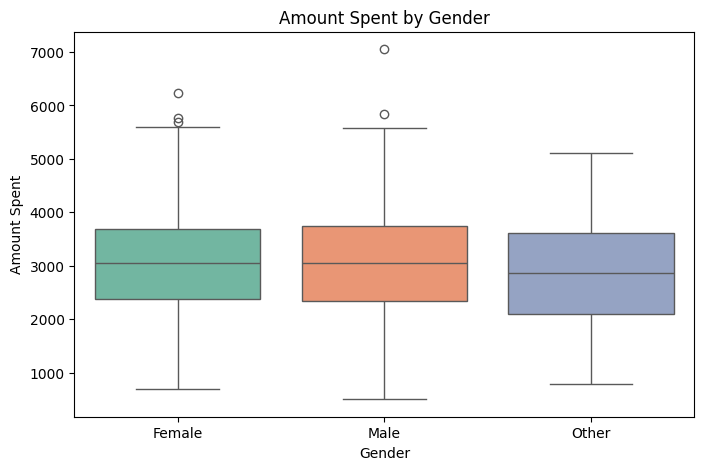

/tmp/ipython-input-16-1515539747.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Membership', y='AmountSpent', data=df, palette='Set3')


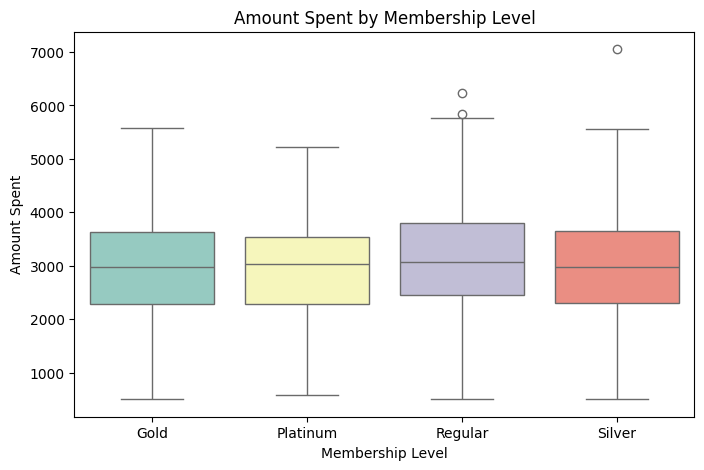

In [ ]:
# Amount Spent by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='AmountSpent', data=df, palette='Set2')
plt.title("Amount Spent by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent")
plt.show()

# Amount Spent by Membership
plt.figure(figsize=(8, 5))
sns.boxplot(x='Membership', y='AmountSpent', data=df, palette='Set3')
plt.title("Amount Spent by Membership Level")
plt.xlabel("Membership Level")
plt.ylabel("Amount Spent")
plt.show()


# 2.2.iii: Bar Charts for Categorical Variables (e.g., ProductCategory, PaymentMethod)

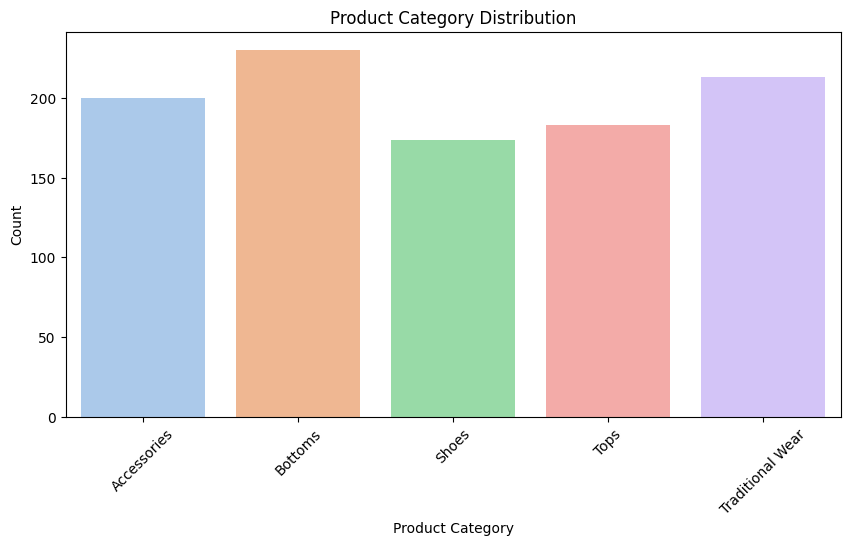

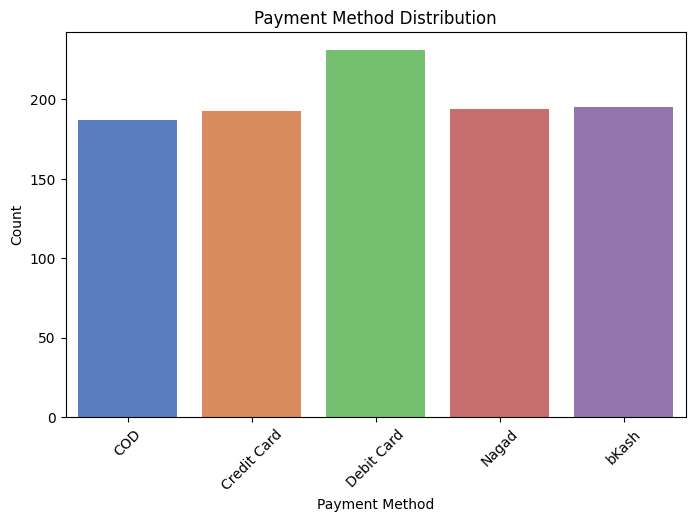

In [ ]:
# Product Category Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='ProductCategory', data=df, palette='pastel', hue='ProductCategory', legend=False)
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Payment Method Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='PaymentMethod', data=df, palette='muted', hue='PaymentMethod', legend=False)
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## **Bivariate Analysis**

# 3.1: Correlation Matrix and Heatmap (Numeric Variables)

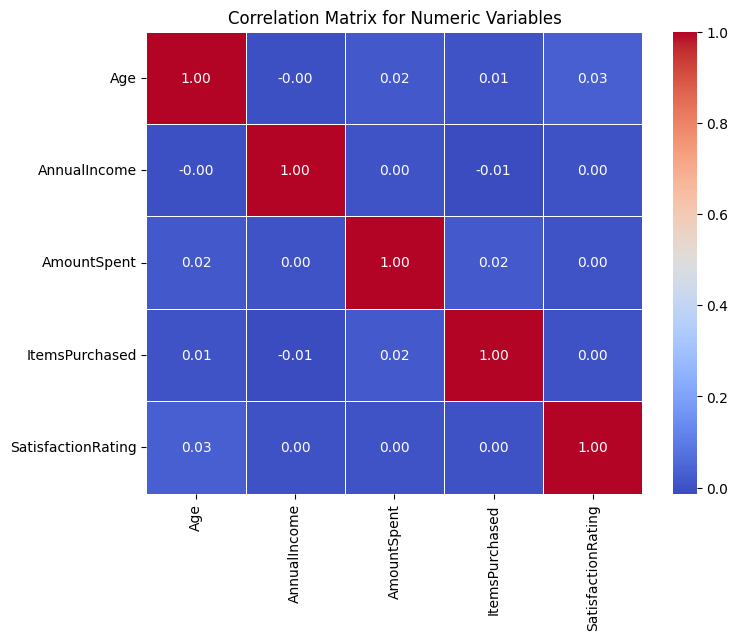

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Variables")
plt.show()


# 3.2: Cross-tabulation (Categorical Relationship)

# 3.2.1 Gender vs. Returned

In [ ]:
# Gender vs Returned cross-tabulation
gender_returned_ct = pd.crosstab(df["Gender"], df["Returned"], margins=True)
print("Gender vs Returned:\n", gender_returned_ct)

Gender vs Returned:
 Returned   No  Yes   All
Gender                  
Female    373   66   439
Male      395   66   461
Other      84   16   100
All       852  148  1000


# 3.2.2 Membership vs. SatisfactionRating

In [ ]:
# Membership vs Satisfaction Rating cross-tabulation
membership_satisfaction_ct = pd.crosstab(df["Membership"], df["SatisfactionRating"], margins=True)
print("Membership vs Satisfaction Rating:\n", membership_satisfaction_ct)

Membership vs Satisfaction Rating:
 SatisfactionRating    1    2    3    4    5   All
Membership                                       
Gold                 42   39   38   47   43   209
Platinum             25   18   22   15   15    95
Regular              88  105   87  106  108   494
Silver               38   47   32   44   41   202
All                 193  209  179  212  207  1000


# 3.3: Box Plots Comparing AmountSpent Across Membership and ProductCategory

 3.3.1 Box Plot: AmountSpent by Membership

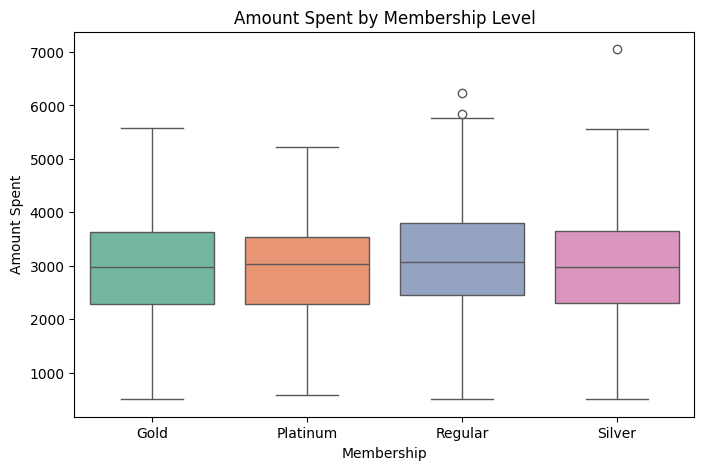

In [ ]:
# Boxplot of AmountSpent by Membership Level
plt.figure(figsize=(8, 5))
sns.boxplot(x="Membership", y="AmountSpent", data=df, palette="Set2", hue="Membership", legend=False)
plt.title("Amount Spent by Membership Level")
plt.xlabel("Membership")
plt.ylabel("Amount Spent")
plt.show()

# 3.3.2 Box Plot: AmountSpent by ProductCategory

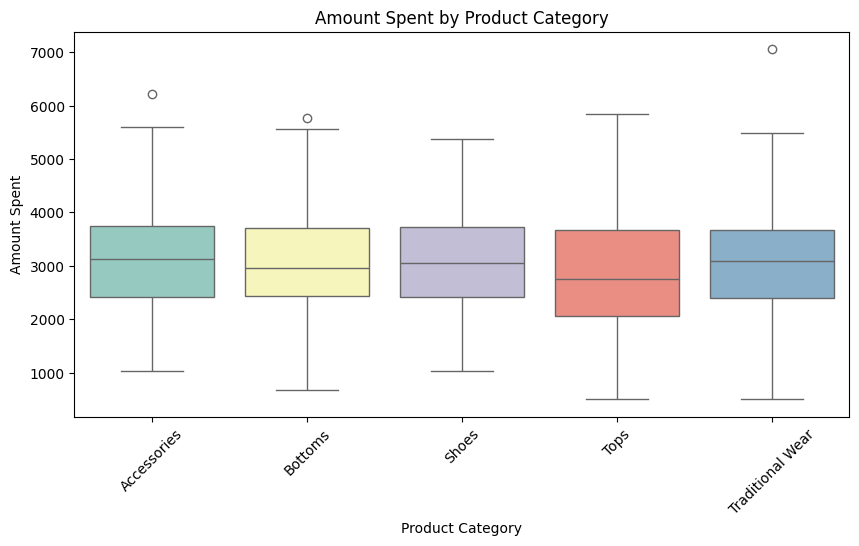

In [ ]:
# Boxplot of AmountSpent by Product Category
plt.figure(figsize=(10, 5))
sns.boxplot(x="ProductCategory", y="AmountSpent", data=df, palette="Set3",hue="ProductCategory", legend=False)
plt.title("Amount Spent by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Amount Spent")
plt.xticks(rotation=45)
plt.show()

# **Step 4: Statistical Hypothesis Testing**

 Hypotheses:

Null (H₀): Gender and Returned are independent (no relationship).

Alternative (H₁): Gender and Returned are dependent (there is a relationship).

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['Returned'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi² Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-Value = {p:.4f}")

# Interpretation
if p < 0.05:
    print(" H₁: There is a significant relationship between Gender and Returned.")
else:
    print(" H₀: No significant relationship between Gender and Returned.")


Chi-Square Test Results:
Chi² Statistic = 0.2187
Degrees of Freedom = 2
P-Value = 0.8964
 H₀: No significant relationship between Gender and Returned.


4.2: Is there a significant difference in AmountSpent between Male and Female customers?

In [ ]:
from scipy.stats import ttest_ind

# Filter AmountSpent by gender
male_spent = df[df['Gender'] == 'Male']['AmountSpent']
female_spent = df[df['Gender'] == 'Female']['AmountSpent']

# Perform t-test
t_stat, p_val = ttest_ind(male_spent, female_spent, equal_var=False)  # Welch's t-test

print("T-Test Results:")
print(f"T-Statistic = {t_stat:.4f}")
print(f"P-Value = {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print(" Reject H₀: There is a significant difference in AmountSpent between Male and Female.")
else:
    print(" Fail to Reject H₀: No significant difference in AmountSpent between Male and Female.")


T-Test Results:
T-Statistic = 0.3825
P-Value = 0.7022
 Fail to Reject H₀: No significant difference in AmountSpent between Male and Female.


4.3: Does AmountSpent differ significantly across Membership levels?

In [ ]:
from scipy.stats import f_oneway

# Prepare data for each group
membership_groups = [df[df['Membership'] == level]['AmountSpent'] for level in df['Membership'].unique()]

# Perform ANOVA
f_stat, p_val = f_oneway(*membership_groups)

print("ANOVA Results:")
print(f"F-Statistic = {f_stat:.4f}")
print(f"P-Value = {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print(" Reject H₀: At least one Membership level differs in AmountSpent.")
else:
    print(" Fail to Reject H₀: No significant difference in AmountSpent across Membership levels.")


ANOVA Results:
F-Statistic = 1.9490
P-Value = 0.1200
 Fail to Reject H₀: No significant difference in AmountSpent across Membership levels.


#** Step 5: Multiple Linear Regression**

5.1: Encode Categorical Variables

In [ ]:
# Create a new copy to avoid modifying original df
df_encoded = pd.get_dummies(df, drop_first=True)

# Confirm encoded variables
print(df_encoded.columns)

Index(['Age', 'AnnualIncome', 'AmountSpent', 'ItemsPurchased',
       'SatisfactionRating', 'Gender_Male', 'Gender_Other',
       'Location_Chattogram', 'Location_Dhaka', 'Location_Khulna',
       'Location_Mymensingh', 'Location_Rajshahi', 'Location_Rangpur',
       'Location_Sylhet', 'Membership_Platinum', 'Membership_Regular',
       'Membership_Silver', 'ProductCategory_Bottoms', 'ProductCategory_Shoes',
       'ProductCategory_Tops', 'ProductCategory_Traditional Wear',
       'Returned_Yes', 'PaymentMethod_Credit Card', 'PaymentMethod_Debit Card',
       'PaymentMethod_Nagad', 'PaymentMethod_bKash'],
      dtype='object')


In [ ]:
# Define target variable
y = df_encoded["AmountSpent"]

# Define feature variables
X = df_encoded.drop("AmountSpent", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

R-squared Score: -0.0622


In [ ]:
# Print regression coefficients
coefficients = pd.Series(lr_model.coef_, index=X.columns)
print("Regression Coefficients:\n", coefficients)

Regression Coefficients:
 Age                                   0.013589
AnnualIncome                          0.000040
ItemsPurchased                       -5.272361
SatisfactionRating                    9.674664
Gender_Male                           9.779730
Gender_Other                       -347.119449
Location_Chattogram                  24.356387
Location_Dhaka                       60.815669
Location_Khulna                    -108.911062
Location_Mymensingh                 161.941526
Location_Rajshahi                  -265.612131
Location_Rangpur                    -46.969856
Location_Sylhet                     -54.801705
Membership_Platinum                  51.644372
Membership_Regular                  149.509553
Membership_Silver                    66.317974
ProductCategory_Bottoms              31.124647
ProductCategory_Shoes                11.076689
ProductCategory_Tops               -206.564515
ProductCategory_Traditional Wear    -61.687820
Returned_Yes                      

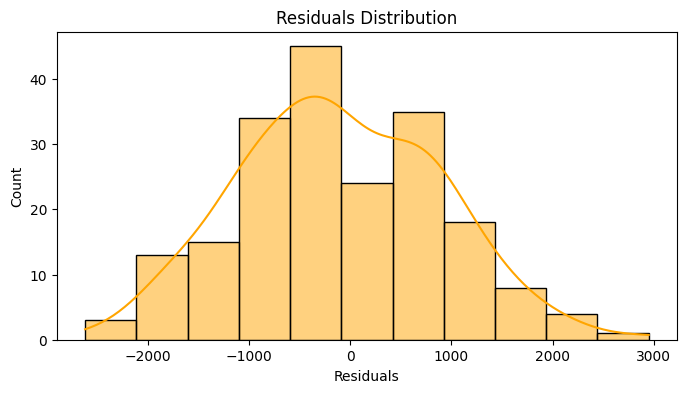

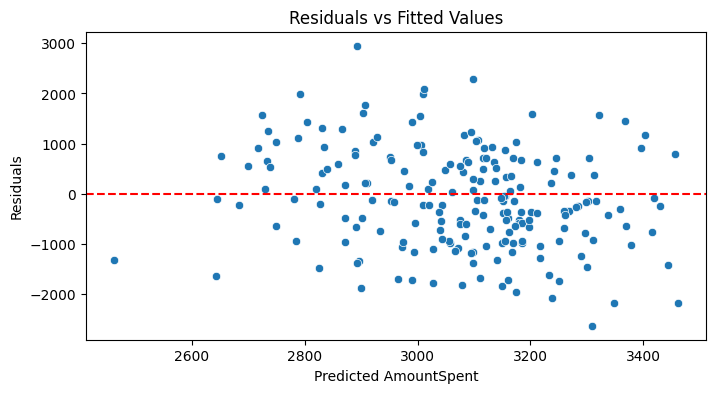

In [ ]:
#Residual Plot & Assumptions Check
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residual distribution
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# Residuals vs Fitted values
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Predicted AmountSpent")
plt.ylabel("Residuals")
plt.show()

# Model Assumptions Checked

| Assumption             | Check via                                 |
| ---------------------- | ----------------------------------------- |
| Linearity              | Residuals should be randomly scattered    |
| Normality of Residuals | Residuals histogram should be bell-shaped |
| Homoscedasticity       | No clear pattern in residual plot         |
| No Multicollinearity   | (Optional: use VIF if needed)             |

# Interpretation of Output

**R² Score:** Indicates the percentage of variance in AmountSpent explained by the model.

**Coefficients**: Show how much AmountSpent changes with a 1-unit change in the predictor (holding others constant).

Example: A positive coefficient for ItemsPurchased means more items → more spending.

One-hot encoded variables (like Gender_Male, Membership_Gold) show effect relative to the base category.